<a href="https://colab.research.google.com/github/David-niches/biblioteca_pandas/blob/main/aula_20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cliente_ds = pd.read_excel('/content/cliente_varejo.xlsx')
varejo_ds = pd.read_excel('/content/varejo.xlsx')

In [5]:
varejo_ds.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [6]:
varejo_ds[['idcompra','idcanalvenda']].groupby('idcanalvenda').count().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,24095
2,Internet,27907
3,Mobile,28087


In [7]:
varejo_ds['idcanalvenda'] = varejo_ds['idcanalvenda'].str.replace('APP','Aplicativo')
varejo_ds[['idcompra','idcanalvenda']].groupby('idcanalvenda').count().reset_index()

,idcanalvenda,idcompra
0,Aplicativo,24234
1,Internet,27907
2,Mobile,28087


In [8]:
varejo_ds['Nome_Departamento'] = varejo_ds['Nome_Departamento'].str.replace(' ','_')
varejo_ds[['idcompra', 'Nome_Departamento']].groupby('Nome_Departamento').count().reset_index()

,Nome_Departamento,idcompra
0,Acessorios_e_Inovacoes,3623
1,Alimentos,2
2,Ar_e_Ventilacao,956
3,Audio,1808
4,Automotivo,904
5,Bebes,4630
6,Beleza_e_Saude,4733
7,Brinquedos,1327
8,"Cama,_Mesa_e_Banho",153
9,Casa_e_Construcao,264


In [9]:
varejo_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [10]:
varejo_ds[varejo_ds['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [11]:
varejo_ds['estado'].fillna('MS', inplace=True)

In [12]:
media_preco = varejo_ds['Preço'].mean()
varejo_ds['Preço'].fillna(media_preco, inplace=True)

In [13]:
varejo_ds[['Preço','Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [14]:
vendas_correto = varejo_ds.query("Preço < Preço_com_frete")

In [15]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [16]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'")

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
115,67265,Internet,A,2023-01-19,207.2,229.024,Esporte_e_Lazer,SP,15386
272,40850,Aplicativo,B,2023-04-06,335.2,373.952,Esporte_e_Lazer,SP,21402
714,447850,Aplicativo,A,2023-01-11,1319.2,1348.400,Esporte_e_Lazer,SP,7498
1352,119890,Mobile,B,2023-03-09,167.2,197.576,Esporte_e_Lazer,SP,19997
1389,114150,Mobile,B,2023-03-07,1743.2,1761.056,Esporte_e_Lazer,SP,15256
...,...,...,...,...,...,...,...,...,...
69360,186900,Aplicativo,B,2023-04-12,479.2,511.760,Esporte_e_Lazer,SP,22412
69424,196585,Internet,B,2023-02-04,1159.2,1235.944,Esporte_e_Lazer,SP,7783
70680,135895,Internet,A,2023-03-23,1039.2,1053.528,Esporte_e_Lazer,SP,19827
71173,479520,Aplicativo,B,2023-03-25,1199.2,1230.040,Esporte_e_Lazer,SP,10609


In [17]:
vendas_correto.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [45]:
precocomfrete_p_dpto = round(vendas_correto.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(), 2)

In [41]:
nvendas_p_dia = vendas_correto.groupby('Data').idcompra.nunique().reset_index()

In [20]:
vendas_correto['mes'] = vendas_correto['Data'].dt.month

<ipython-input-20-b8f36b7b5813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correto['mes'] = vendas_correto['Data'].dt.month


In [21]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [31]:
nvendas_p_mes = vendas_correto.groupby('mes').idcompra.nunique().sort_values(ascending=False).reset_index()

In [23]:
cliente_ds

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207
...,...,...,...
26420,20177,48,3132
26421,23977,31,5108
26422,25398,35,13136
26423,26390,50,12304


In [24]:
vendas_cliente = vendas_correto.merge(cliente_ds, how='left', on='cliente_Log')

In [30]:
renda_p_canal = vendas_cliente.groupby('idcanalvenda')['renda'].agg('mean').sort_values(ascending=False).reset_index()

In [29]:
idade_p_bandeira = vendas_cliente.groupby('bandeira')['idade'].agg('mean').sort_values(ascending=False).reset_index()

Text(0.5, 1.0, 'Idade média por bandeira')

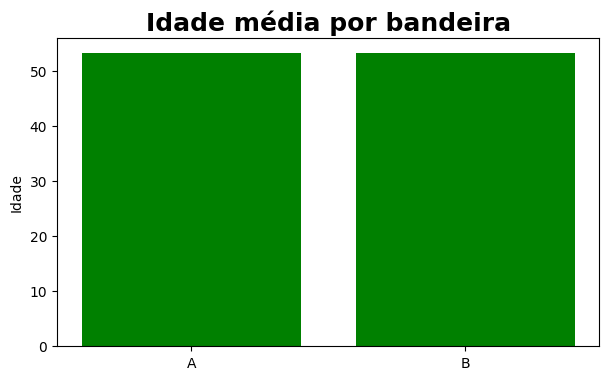

In [32]:
fig = plt.figure(figsize = (7,4))

plt.bar(idade_p_bandeira['bandeira'], idade_p_bandeira['idade'], color='green')

plt.ylabel('Idade')

plt.title('Idade média por bandeira', loc='center', fontsize = 18, fontweight = 'bold', color ='black')

Text(0.5, 1.0, 'Renda média por canal de venda')

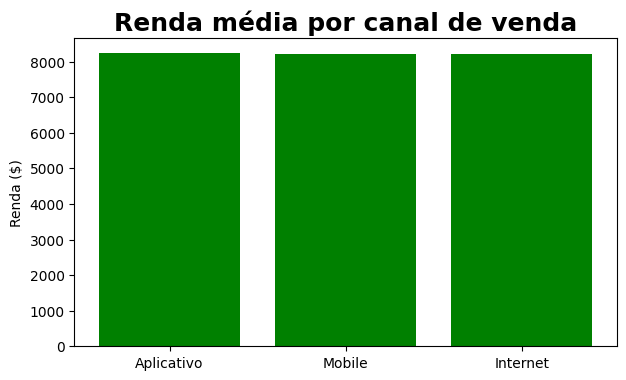

In [36]:
fig = plt.figure(figsize = (7,4))

plt.bar(renda_p_canal['idcanalvenda'], renda_p_canal['renda'], color='green')

plt.ylabel('Renda ($)')

plt.title('Renda média por canal de venda', loc='center', fontsize = 18, fontweight = 'bold', color ='black')

Text(0.5, 1.0, 'Renda média por canal de venda')

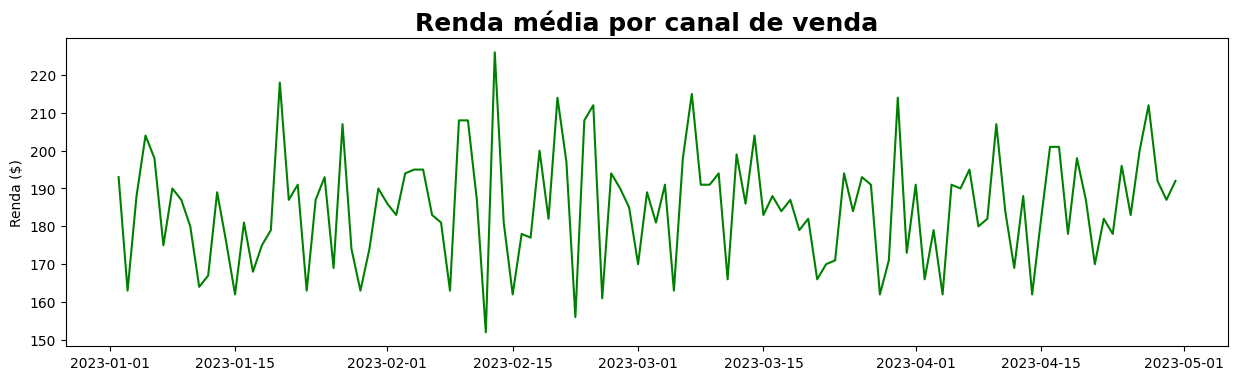

In [43]:
fig = plt.figure(figsize = (15,4))

plt.plot(nvendas_p_dia['Data'], nvendas_p_dia['idcompra'], color='green')

plt.ylabel('Renda ($)')

plt.title('Renda média por canal de venda', loc='center', fontsize = 18, fontweight = 'bold', color ='black')

Text(0.5, 1.0, 'Preço com frete por departamento')

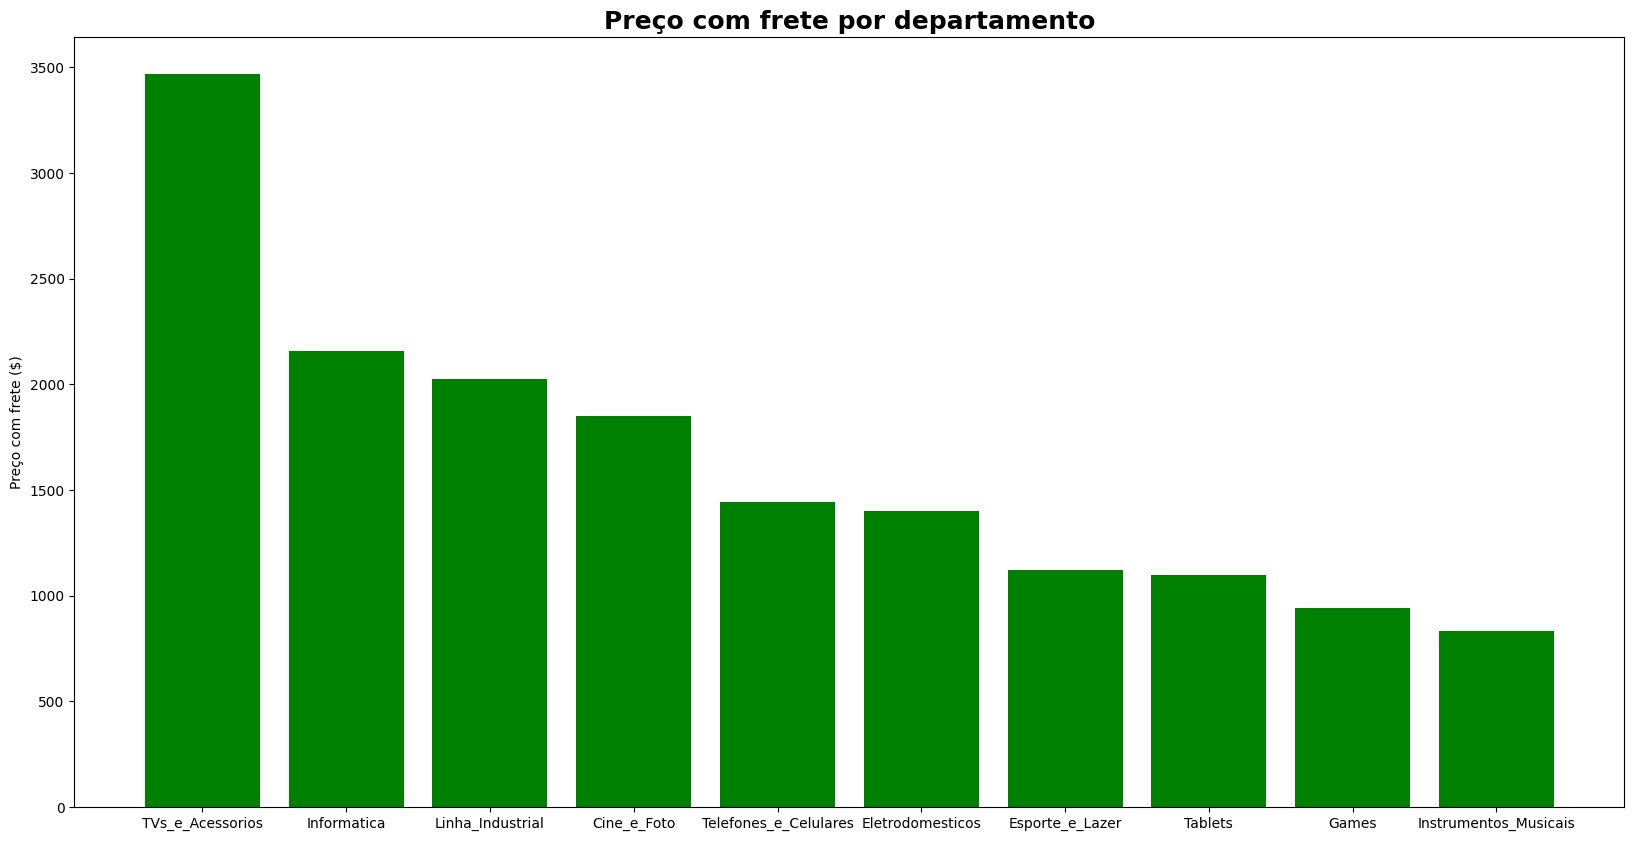

In [58]:
fig = plt.figure(figsize = (20,10))
x = precocomfrete_p_dpto['Nome_Departamento'].loc[0:9]
y = precocomfrete_p_dpto['Preço_com_frete'].loc[0:9]

plt.bar(x, y, color='green')

plt.ylabel('Preço com frete ($)')

plt.title('Preço com frete por departamento', loc='center', fontsize = 18, fontweight = 'bold', color ='black')


In [60]:
import plotly.graph_objects as go
import plotly.express as px

In [61]:
px.bar(idade_p_bandeira, x= 'bandeira', y= 'idade')

In [63]:
px.line(nvendas_p_dia, x='Data', y='idcompra')

In [65]:
px.bar(precocomfrete_p_dpto, x='Nome_Departamento', y='Preço_com_frete')